# **Providing data-driven suggestions for HR**

## Description

This project is to analyze a dataset and build predictive models that can provide insights to the HR department.


## **Plan**


### Understand the business scenario and problem
The goals of this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the business.

### The HR dataset

The source of the dataset is on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

### Load dataset

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("C:\GitHub\HR_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                      'average_montly_hours': 'average_monthly_hours',
                      'time_spend_company': 'tenure',
                      'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [9]:
# Inspect some rows containing duplicates
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df1=df0.drop_duplicates()

### Check outliers

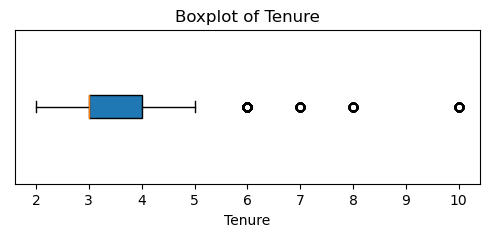

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 2))
plt.boxplot(df1['tenure'], vert=False, patch_artist=True)

# Add title and labels
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure')
plt.yticks([])

# Show the plot
plt.show()

In [12]:
# Determine the number of rows containing outliers
len(df1[df1['tenure']>5])

824

# Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left_counts = df1['left'].value_counts()

# Calculate percentages of people who left vs. stayed
percent_left = left_counts[1] / len(df1) * 100
percent_stayed = left_counts[0] / len(df1) * 100

# Print the results
print("Number of people who left:", left_counts[1])
print("Number of people who stayed:", left_counts[0])
print("Percentage of people who left: {:.2f}%".format(percent_left))
print("Percentage of people who stayed: {:.2f}%".format(percent_stayed))


Number of people who left: 1991
Number of people who stayed: 10000
Percentage of people who left: 16.60%
Percentage of people who stayed: 83.40%


### Data visualizations

Now, examine variables and create plots to visualize relationships between variables in the data.



#### Investigate the relationships between "number of projects", "average monthly hours", and "left"

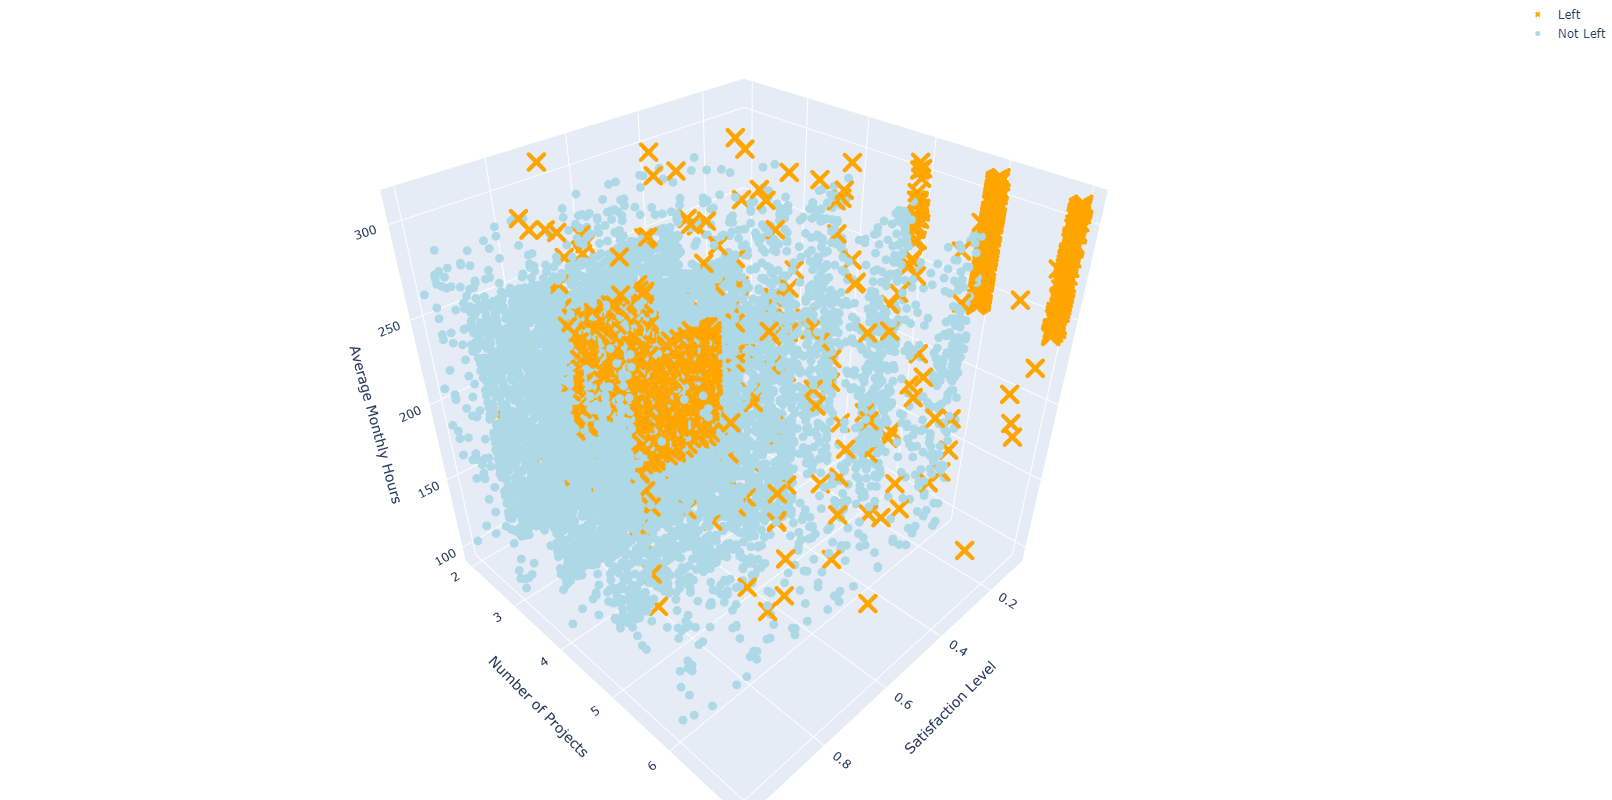

In [14]:
import plotly.graph_objects as go

# Separate data for employees who left and who did not
left_data = df1[df1['left'] == 1]
not_left_data = df1[df1['left'] == 0]

# Create 3D scatter plot for employees who left
scatter_left = go.Scatter3d(
    x=left_data['satisfaction_level'],
    y=left_data['number_project'], 
    z=left_data['average_monthly_hours'],
    mode='markers',
    marker=dict(color='orange', size=5, symbol='x'),
    name='Left'
)

# Create 3D scatter plot for employees who did not leave
scatter_not_left = go.Scatter3d(
    x=not_left_data['satisfaction_level'],
    y=not_left_data['number_project'],
    z=not_left_data['average_monthly_hours'],
    mode='markers',
    marker=dict(color='lightblue', size=5, symbol='circle'),
    name='Not Left'
)

# Combine both scatter plots
data = [scatter_left, scatter_not_left]

# Set the layout of the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Satisfaction Level'),
        yaxis=dict(title='Number of Projects'), 
        zaxis=dict(title='Average Monthly Hours'),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

fig.update_layout(width=1000, height=800)

# Show the interactive 3D plot
fig.show()

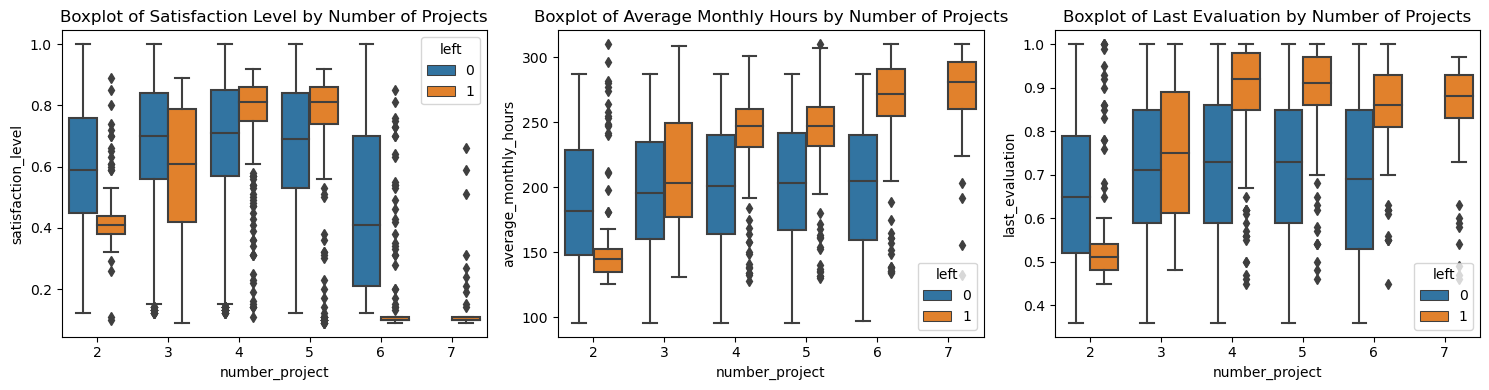

In [15]:
# Create a figure with 3 subplots side by side
plt.figure(figsize=(15, 4)) 

# First subplot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot index 1
sns.boxplot(x="number_project", y="satisfaction_level", hue="left", data=df1)
plt.title('Boxplot of Satisfaction Level by Number of Projects')

# Second subplot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot index 2
sns.boxplot(x="number_project", y="average_monthly_hours", hue="left", data=df1)
plt.title('Boxplot of Average Monthly Hours by Number of Projects')

# Third subplot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot index 3
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=df1)
plt.title('Boxplot of Last Evaluation by Number of Projects')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

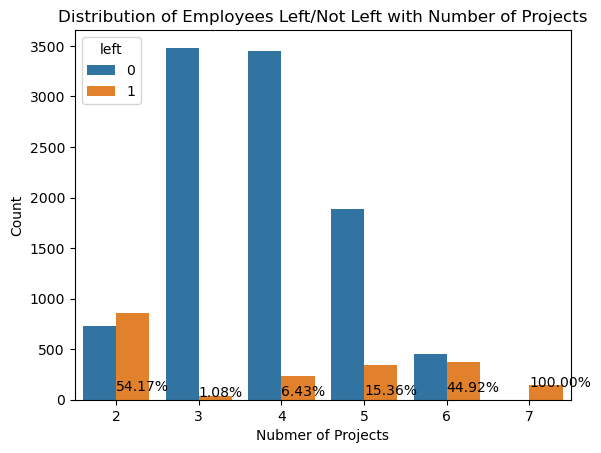

In [16]:
percentage_left = df1[df1['left'] == 1].groupby('number_project').size() / df1.groupby('number_project').size() * 100

sns.countplot(x='number_project', hue='left', data=df1)

# Add text labels for the percentage on top of each bar
for index, value in enumerate(percentage_left):
    plt.text(index, value, f'{value:.2f}%', ha='left', va='bottom')

plt.xlabel('Nubmer of Projects')
plt.ylabel('Count')
plt.title('Distribution of Employees Left/Not Left with Number of Projects')
plt.show()

#### The relationship between number of projects and left/not left
- A very high percentage of employees with 6 or 7 projects and long working hours left
- 54% of employees with only 2 proects and less working hours left.
- Most employees have 3 or 4 projects and the left rate of which is relatively low. 

#### Examine the relationship between "Tenure", "Average Monthly Hours" and "Left"


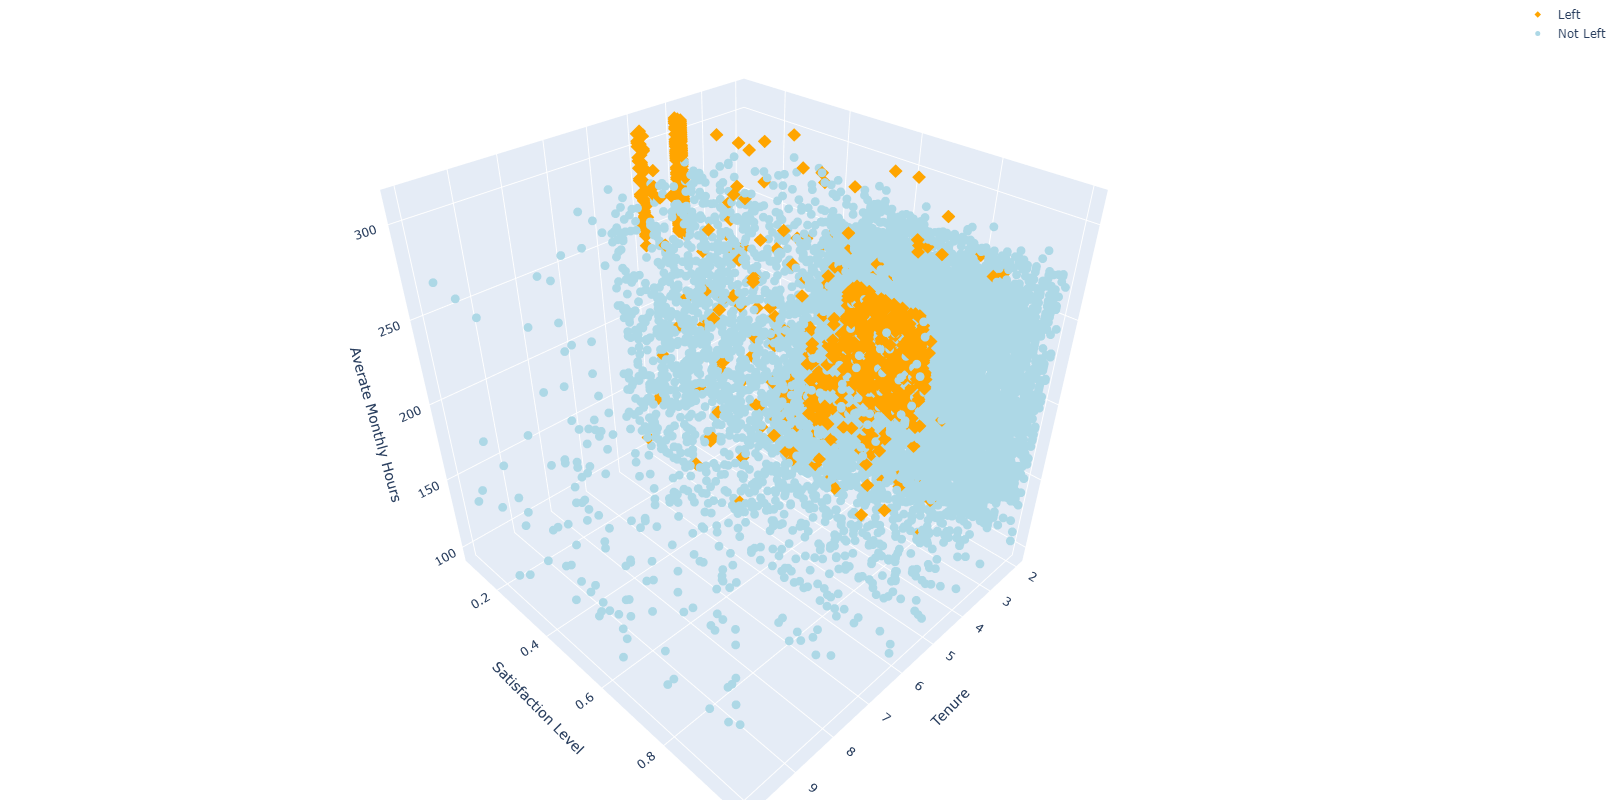

In [17]:
# Create a plot as needed
# Create 3D scatter plot for employees who left
scatter_left = go.Scatter3d(
    x=left_data['tenure'],
    y=left_data['satisfaction_level'],
    z=left_data['average_monthly_hours'],
    mode='markers',
    marker=dict(color='orange', size=5, symbol='diamond'),
    name='Left'
)

# Create 3D scatter plot for employees who did not leave
scatter_not_left = go.Scatter3d(
    x=not_left_data['tenure'],
    y=not_left_data['satisfaction_level'],
    z=not_left_data['average_monthly_hours'],
    mode='markers',
    marker=dict(color='lightblue', size=5, symbol='circle'),
    name='Not Left'
)

# Combine both scatter plots
data = [scatter_left, scatter_not_left]

# Set the layout of the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Tenure'),
        yaxis=dict(title='Satisfaction Level'),
        zaxis=dict(title='Averate Monthly Hours'),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Create the figure
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1200, height=800)

# Show the interactive 3D plot
fig.show()



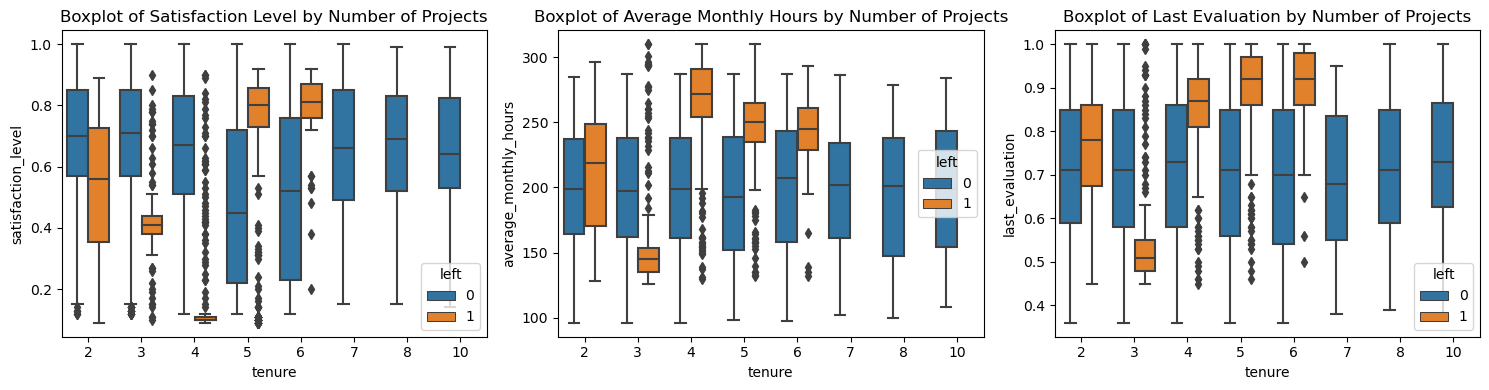

In [18]:
# Create a figure with 3 subplots side by side
plt.figure(figsize=(15, 4)) 

# First subplot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot index 1
sns.boxplot(x="tenure", y="satisfaction_level", hue="left", data=df1)
plt.title('Boxplot of Satisfaction Level by Number of Projects')

# Second subplot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot index 2
sns.boxplot(x="tenure", y="average_monthly_hours", hue="left", data=df1)
plt.title('Boxplot of Average Monthly Hours by Number of Projects')

# Third subplot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot index 3
sns.boxplot(x="tenure", y="last_evaluation", hue="left", data=df1)
plt.title('Boxplot of Last Evaluation by Number of Projects')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


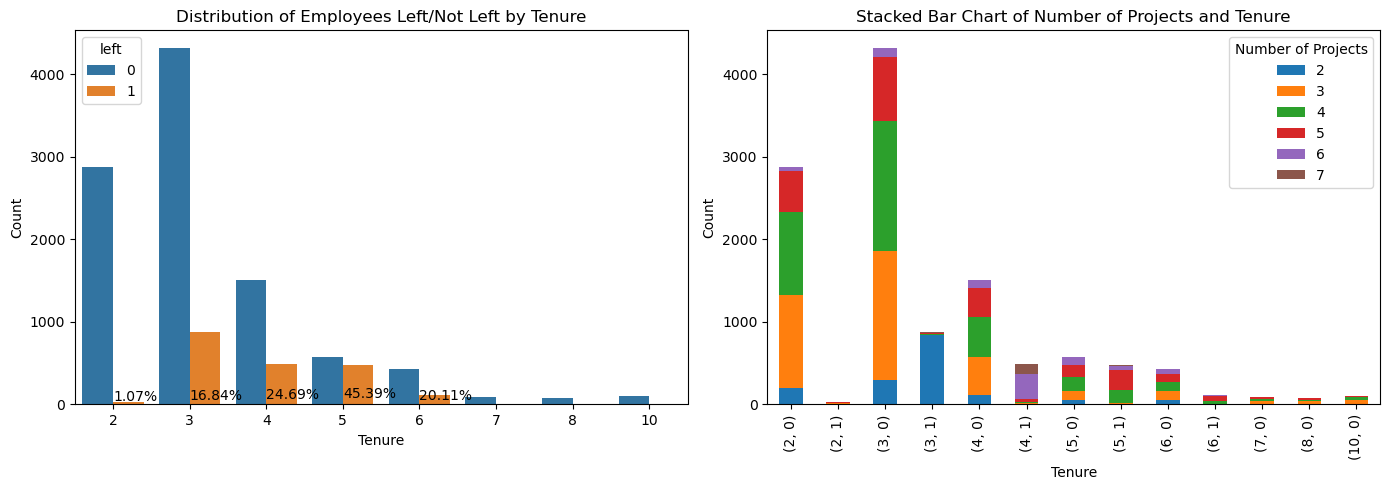

In [19]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First subplot
sns.countplot(x='tenure', hue='left', data=df1, ax=axes[0])

# Add text labels for the percentage on top of each bar
percentage_left = df1[df1['left'] == 1].groupby('tenure').size() / df1.groupby('tenure').size() * 100
for index, value in enumerate(percentage_left):
    axes[0].text(index, value, f'{value:.2f}%', ha='left', va='bottom')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Employees Left/Not Left by Tenure')

# Pivot the data to create a new DataFrame for plotting
pivot_data = df1.groupby(['tenure', 'left', 'number_project']).size().unstack('number_project', fill_value=0)

# Second subplot
pivot_data.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Count')
axes[1].set_title('Stacked Bar Chart of Number of Projects and Tenure')
axes[1].legend(title='Number of Projects')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### The relationship between "Tenure" and "Left"
- Most of the employees join the company in the past 2 or 3 years. 
- 45% employees with 5 year tenure left the company, they have longer working hours and higher satisfation level than those who stayed. 
- The 4-year tenure employees with the most working hours and lowest satisfation level left the company
- The employees who left with 3 year tenure have only 2 projects while the employess with 4 year tenure have 6-7 projects. 



#### Examine the relationshop between "department" and "left"


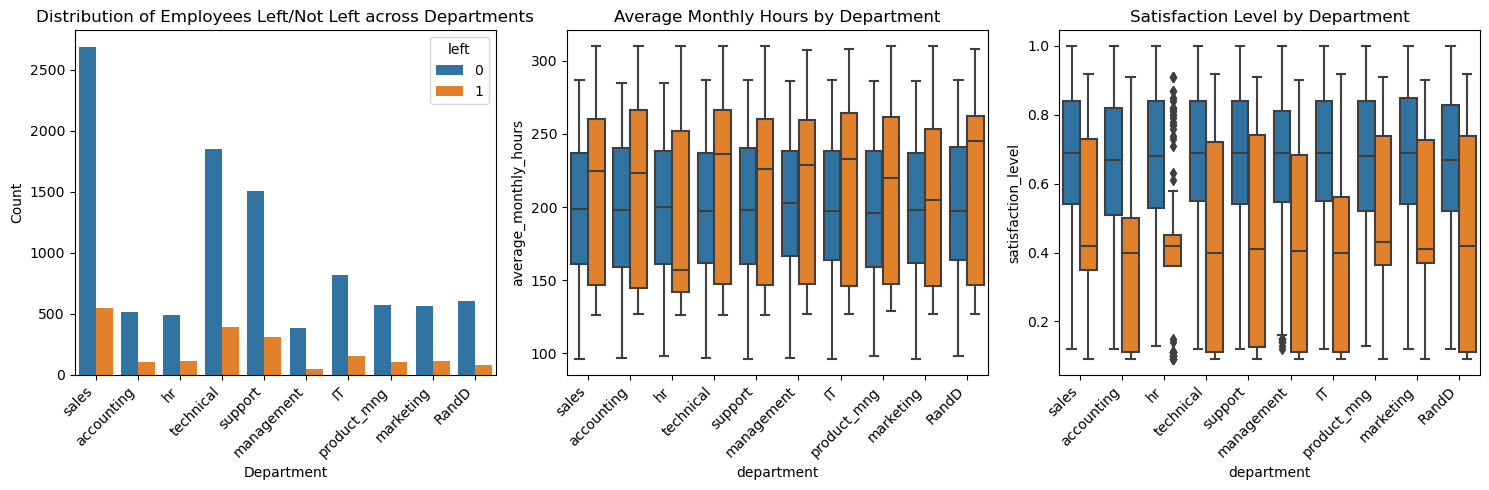

In [98]:
# Create a figure with 3 subplots side by side
plt.figure(figsize=(15,5)) 

# First subplot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot index 1
sns.countplot(x='department', hue='left', data=df1)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Employees Left/Not Left across Departments')
plt.xticks(rotation=45, ha='right')

# Second subplot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot index 2
sns.boxplot(x="department", y="average_monthly_hours", hue="left", data=df1)
plt.title('Average Monthly Hours by Department')
plt.xticks(rotation=45, ha='right')
plt.gca().get_legend().remove()

# Third subplot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot index 3
sns.boxplot(x="department", y="satisfaction_level", hue="left", data=df1)
plt.title('Satisfaction Level by Department')
plt.xticks(rotation=45, ha='right')
plt.gca().get_legend().remove()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Examine the relationship between "Salary" and "Left"

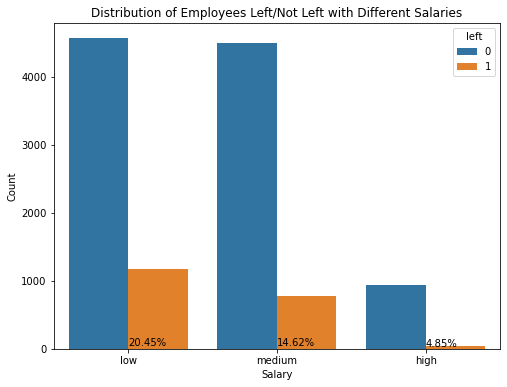

In [45]:

percentage_left = df1[df1['left'] == 1].groupby('salary').size() / df1.groupby('salary').size() * 100

# Order the salary categories based on the percentage of people who left
sorted_salaries = percentage_left.sort_values(ascending=False).index

# Create a count plot for 'salary' and 'left' with the ordered salary categories
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df1, order=sorted_salaries)

# Add text labels for the percentage on top of each bar
for index, value in enumerate(percentage_left[sorted_salaries]):
    plt.text(index, value, f'{value:.2f}%', ha='left', va='bottom')

plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Employees Left/Not Left with Different Salaries')
plt.show()





#### 

#### Check the corelation between all the variables

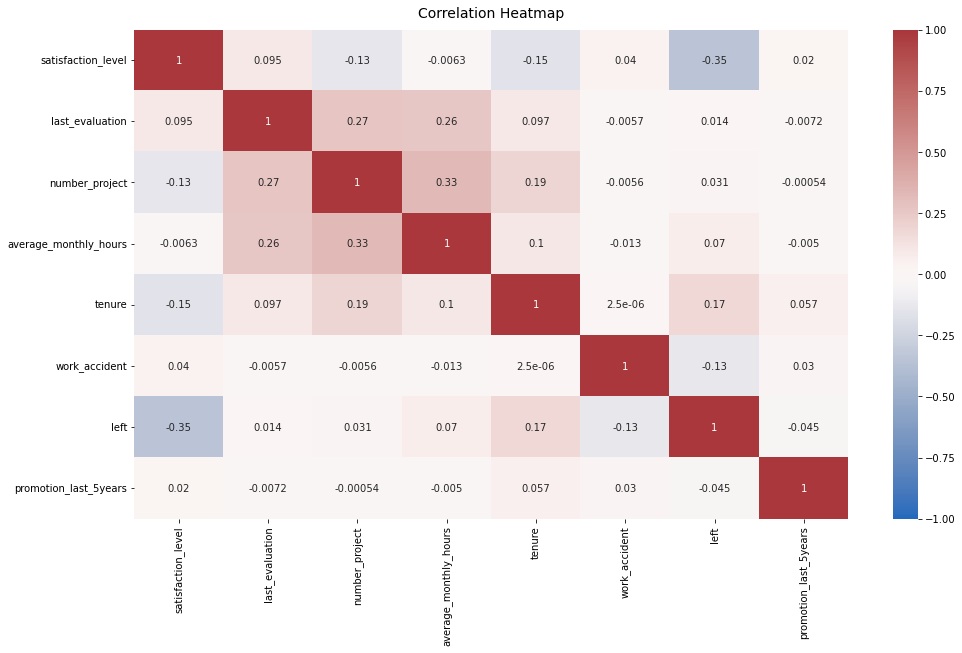

In [153]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

- The employees with only 2 projects or 6-7 have a high chance to leave. 
- Over 90% of the employees with 3 year tenure who left are those only have 2 projects
- The employees with 4 year tenure who left are those with 6-7 projects and very low satisfaction level. 
- There is no obvious pattern between the department and the left
- The employees with lower salary have more chance to leave
- There are some extent of corelations between "number of projects", "average monthly hours" and "last evaluation".

# Construct Stage

## Step 3. Model Building

### Logistic Regression Model


In [20]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   
6       4              0     1                      0       0              0   
7       5              0     1                      0       0              0   
8       5              0     1                      0       0              0   
9       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0  
6                 1                   0                     0  
7                 1                   0                     0  
8                 1                   0                     0  
9                 1                   0                     0

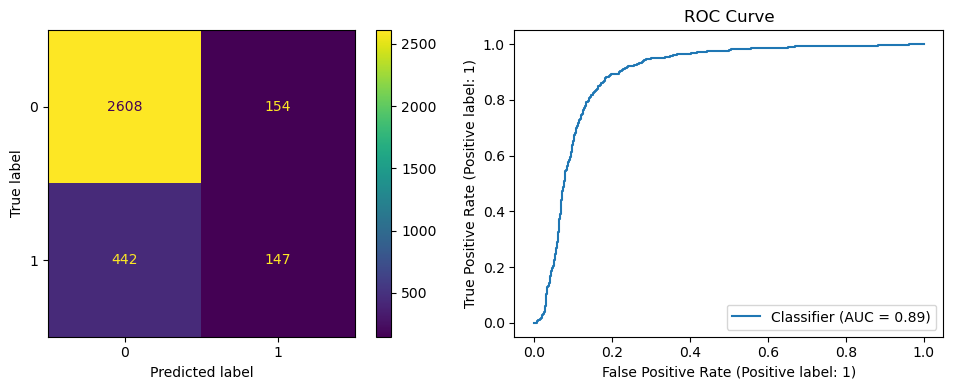

Accuracy: 0.822143
Precision: 0.488372
Recall: 0.249576
F1 Score: 0.330337
AUC: 0.887896


In [21]:
#Remove outliers
df_logreg = df_enc[df_enc['tenure'] <= 5]

X = df_logreg.drop(columns=['left'], axis=1)
y = df_logreg['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000, solver='lbfgs').fit(X_train, y_train)

# Confusion Matrix
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Confusion Matrix
disp_cm.plot(ax=axes[0], values_format='')

# Plot ROC Curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_prob, pos_label=1, ax=axes[1])
roc_disp.ax_.set_title('ROC Curve')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))
print("AUC:", "%.6f" % metrics.roc_auc_score(y_test, y_pred_prob))

- The model predicted 2608 people not left accurately;
- The model predicted 147 employs left accurately;
- The model predicted 154 employees left who actually are not left;
- The model predicted 442 employees not left who actually left;

The Recall rate is only 24.9%, which means the model was able to correctly identify and predict only 24.6% of all the employees who actually left as "Left" (true positives). In other words, the model missed identifying approximately 75.1% of the employees who actually left (false negatives). 

The model is not good enough, we will need to build other models. 

### Decision Tree Model

In [109]:
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics


X = df_enc.drop(columns = ['left'], axis=1)
y = df_enc['left']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0)

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Instantiate GridSearch
tree_1 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='recall')


In [26]:
%%time
tree_1.fit(X_train, y_train)

Wall time: 2.86 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'precision', 'f1', 'roc_auc', 'recall', 'accuracy'})

In [28]:
# Check best parameters
tree_1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [29]:
tree_1.best_score_

0.9169492193660306

In [58]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [61]:
tree_1_cv_results = make_results('decision tree 1 cv', tree_1, 'recall')
tree_1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree 1 cv   0.916398  0.916949  0.916627  0.972312  0.969142



Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. So construct a random forest next. 

### Build a random forest

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [35]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [75]:

# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100,150,200], 
              'max_depth' : [3,4,5,6],        
              'min_samples_leaf' : [1,2], 
              'max_features' : [4,5,1.0]}

# Instantiate GridSearch
rf_1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [76]:
%%time
rf_1.fit(X_train, y_train)

Wall time: 2min 32s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': [4, 5, 1.0],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 150, 200]},
             refit='recall',
             scoring={'precision', 'f1', 'roc_auc', 'recall', 'accuracy'})

In [77]:
rf_1.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [78]:
# Check best recall score on CV
rf_1.best_score_

0.9176176685638915

In [80]:
rf_1_cv_results = make_results('random forest 1 cv', rf_1, 'recall')
rf_1_cv_results

model  precision    recall        F1  accuracy       auc
0  random forest 1 cv   0.838516  0.917618  0.876071  0.956855  0.970119

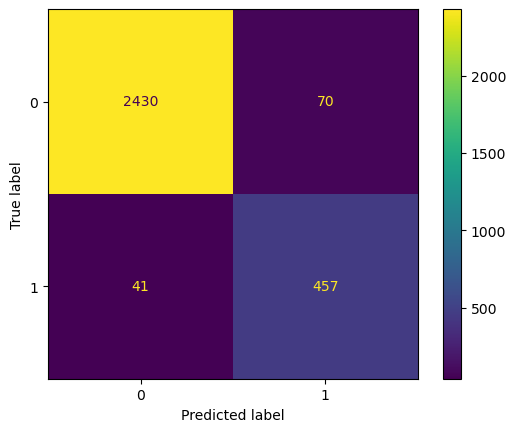

In [101]:
rf1_pred = rf_1.predict(X_test)

cm = metrics.confusion_matrix(y_test, rf1_pred, labels = rf_1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_1.classes_)

# Plot Confusion Matrix
disp.plot(values_format='')


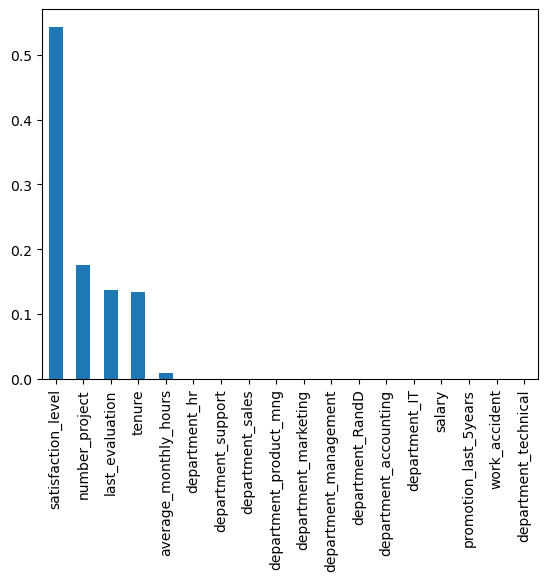

In [110]:
importances = rf_1.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

### Feature Engineering

In [81]:
df2 = df_enc.copy()

# Create `overworked` column as working > 176 hrs/month (22 working day * 8 hours per day  = 176 hours)
df2['overworked'] = (df2['average_monthly_hours'] > 176).astype(int)

# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

In [115]:

y = df2['left']
X = df2.drop('left', axis=1)

In [116]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [92]:
# Determine set of hyperparameters.
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

tree_2 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='recall')

In [93]:
%%time
tree_2.fit(X_train, y_train)

Wall time: 2.12 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'precision', 'f1', 'roc_auc', 'recall', 'accuracy'})

In [95]:
# Check best auc score on CV
tree_2.best_score_

0.9149492480394547

In [96]:
tree_2.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [97]:
tree_2_cv_results = make_results('tree 2 cv', tree_2, 'recall')
tree_2_cv_results

model  precision    recall        F1  accuracy       auc
0  tree 2 cv   0.943354  0.914949  0.928898   0.97676  0.955637

In [ ]:
# Instantiate GridSearch

cv_params = {'n_estimators' : [50,100,150], 
              'max_depth' : [3,4,5,6],        
              'min_samples_leaf' : [1,2], 
              'max_features' : [4,5,1.0]}

rf_2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [85]:
%%time
rf_2.fit(X_train, y_train)

Wall time: 1min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': [4, 5, 1.0],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 150]},
             refit='recall',
             scoring={'precision', 'f1', 'roc_auc', 'recall', 'accuracy'})

In [86]:
# Check best auc score on CV
rf_2.best_score_

0.9169474272770282

In [87]:
rf_2.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [105]:
rf_2_cv_results = make_results('random forest 2 cv', rf_2, 'recall')
rf_2_cv_results

model  precision    recall        F1  accuracy       auc
0  random forest 2 cv   0.845221  0.916947  0.879546  0.958301  0.971227

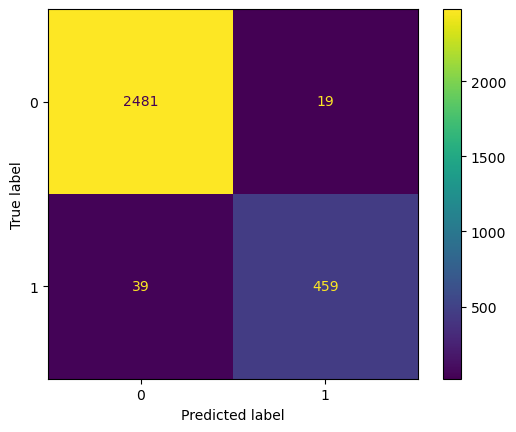

In [119]:
tree_2_pred = tree_2.best_estimator_.predict(X_test)

cm = metrics.confusion_matrix(y_test, tree_2_pred, labels = tree_2.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = tree_2.classes_)

# Plot Confusion Matrix
disp.plot(values_format='')

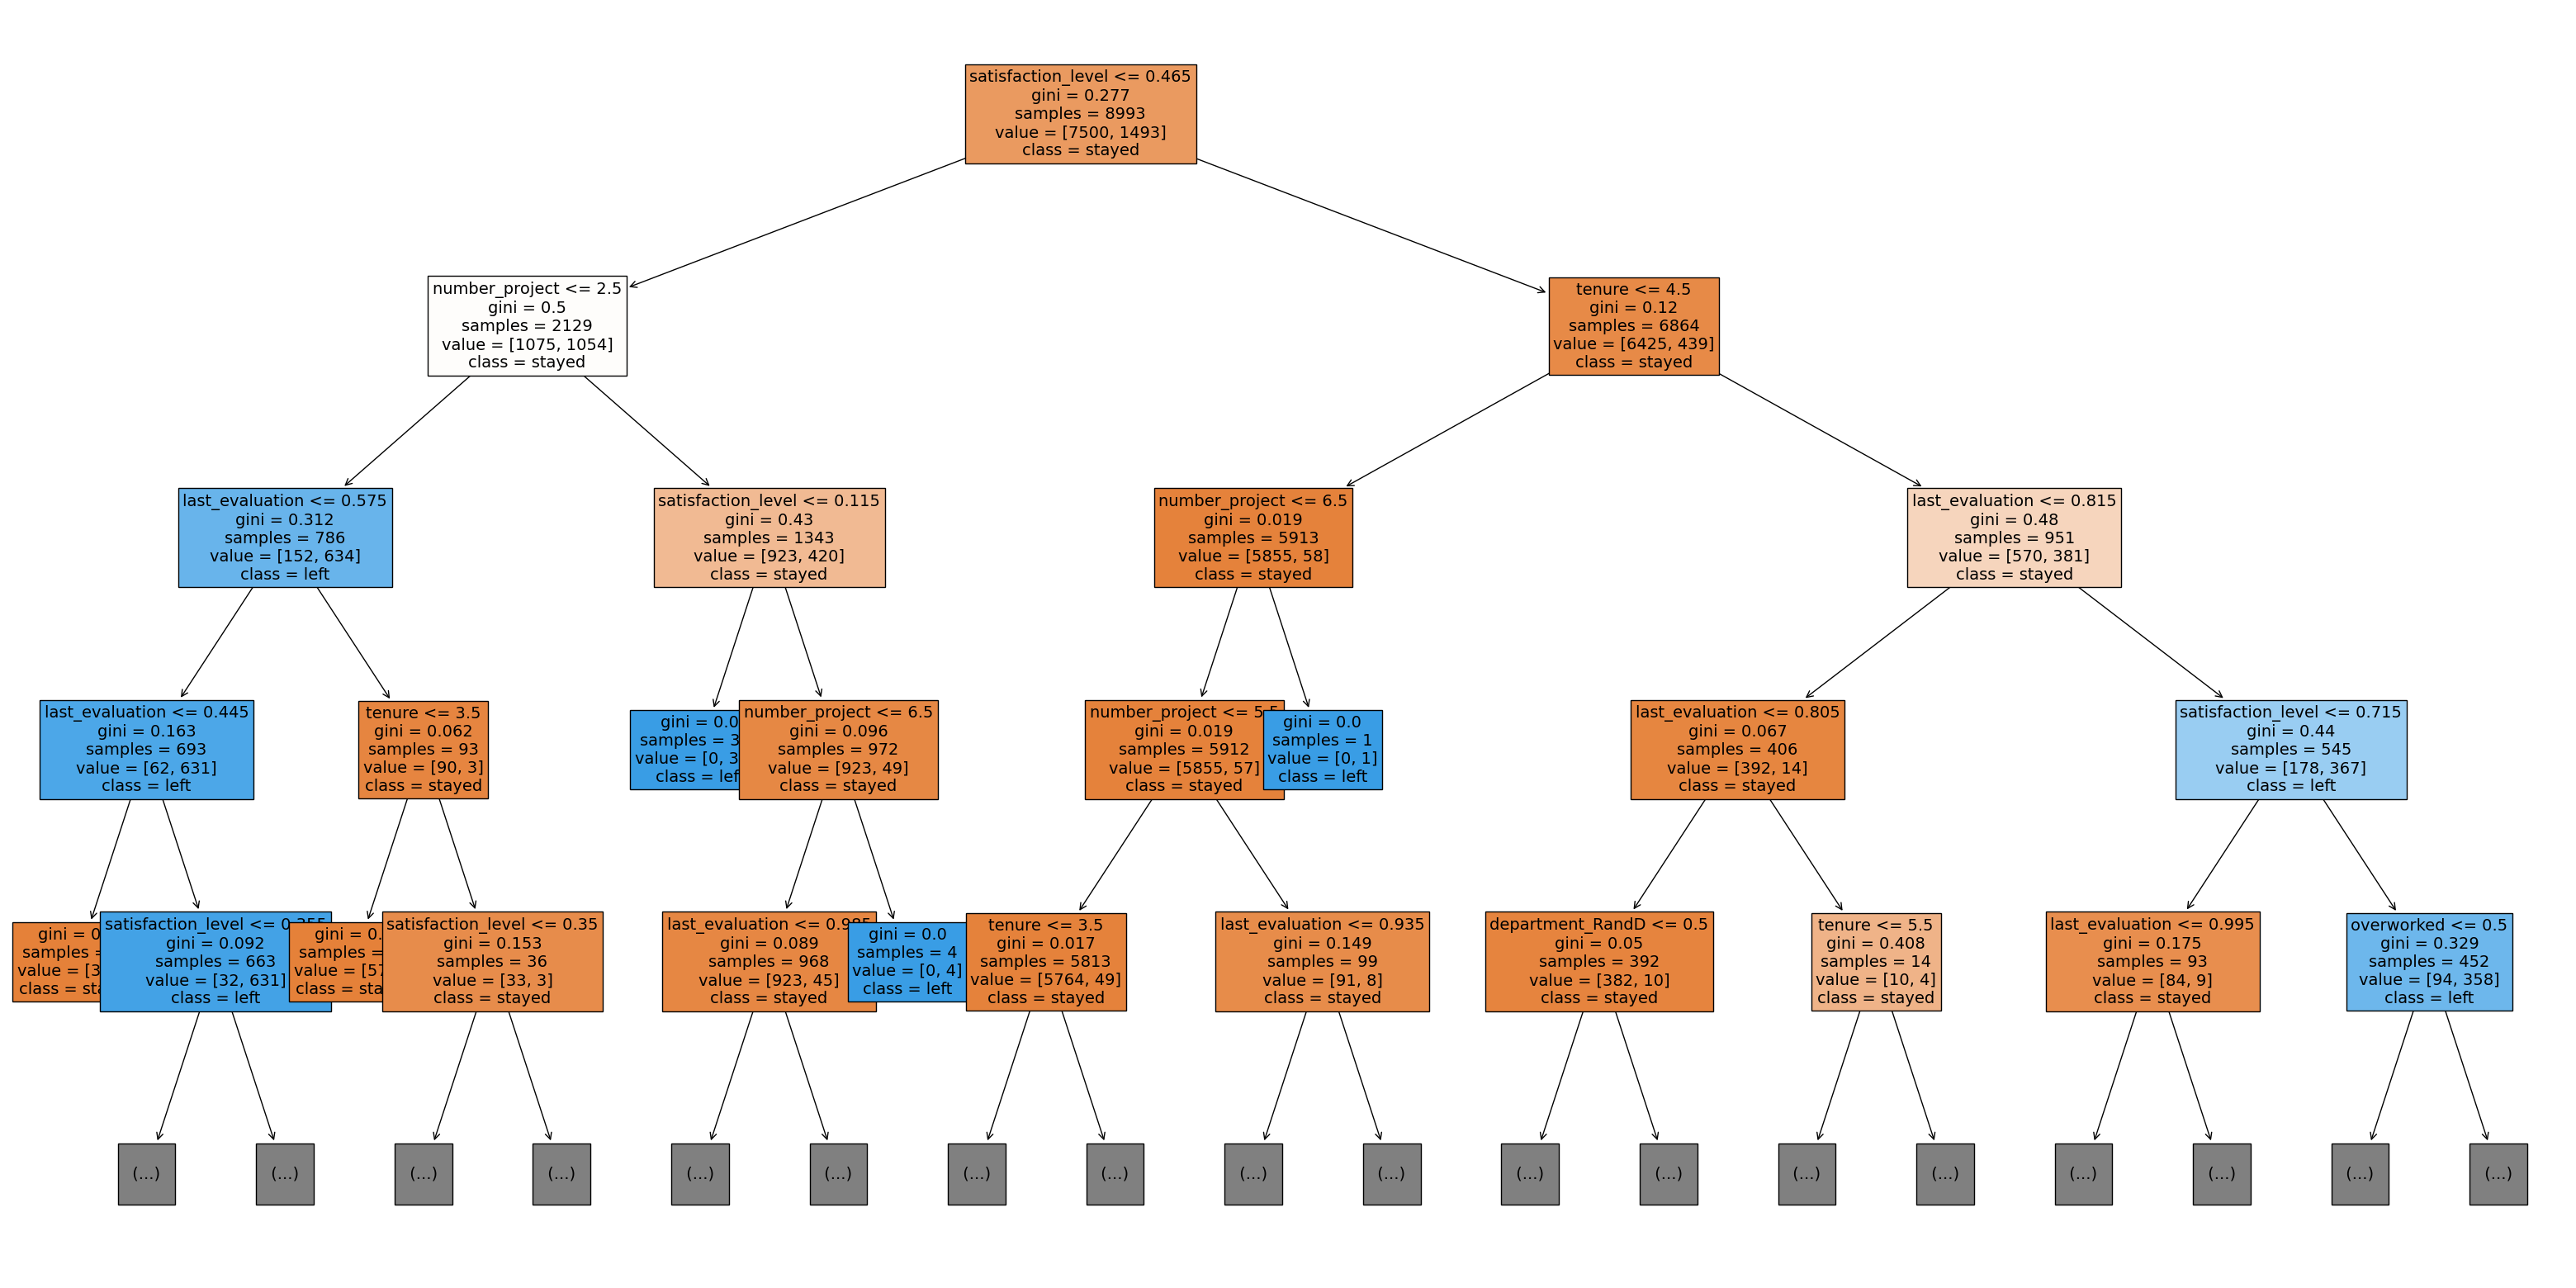

In [122]:
# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(tree_2.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

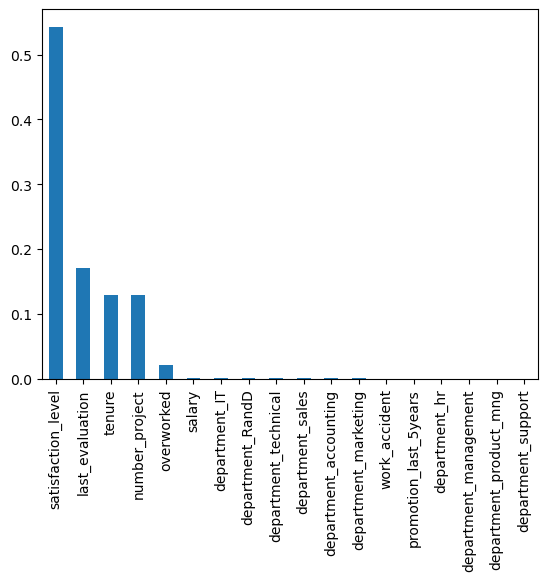

In [120]:
importances = tree_2.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

# Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Based on the results shown in the table above, the F1, precision, recall, and accuracy scores of the tree_2 model outperform other models.

### Conclusion
The EDA and the feature importance of the model show the employees are overworked. Employees with too many projects or too less projects left the company.

### Recommendations

To retain employees, the following recommendations could be presented to the stakeholders:

- Don't require employees to work overtime.
- Cap the number of projects that employees can work on.
- Give more projects to 3-year tenure employees who only have 2 projects. 


### Next Steps

- Consider further survey to the employees with 4 year tenure to check if any policies impact them.  
- Consider further survey to 5-6 year tenure, noticed the higher satisfaction employees left. 
- Consider further investigation on why those 3-year tenure employees only have 2 projects. Since 43% of the employees joined the company 3 years ago, maybe due to the company expand too fast and they don't actually have so many projects to keep them busy. 
- Consider analyzing the related factors for the satisfaction level

